# IMDB dataset sentiment analysis

Dataset can be found here:https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr

Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/imdb-reviews-pt-br.csv')

In [4]:
data.shape

(49459, 4)

In [5]:
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [6]:
data.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [7]:
data.sentiment = data.sentiment.replace(['neg', 'pos'], [0,1])

In [8]:
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


In [9]:
data = data[['text_pt', 'sentiment']]
data.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [10]:
data.text_pt[0], data.sentiment[0]

('Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 0)

Criando Bag of Words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

bow = cv.fit_transform(data['text_pt'])

In [12]:
bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=cv.get_feature_names_out())
bow.head()

,00,000,0000000000001,0000001,00001,00015,000dm,000wtf,001,003830,...,útero,útil,über,übermensch,übermenschlich,überwoman,četvorka,œaberrações,ʻo,ʻos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bow, data.sentiment, random_state = 42)

In [14]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8840274969672463

## Métodos de Visualização

Visualizando Word Cloud

In [ ]:
#docs: https://amueller.github.io/word_cloud/index.html

!pip install wordcloud

In [20]:
str(data.text_pt.values)

'[\'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.\'\n \'Este é um e

In [61]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in data.text_pt]))

(-0.5, 799.5, 499.5, -0.5)

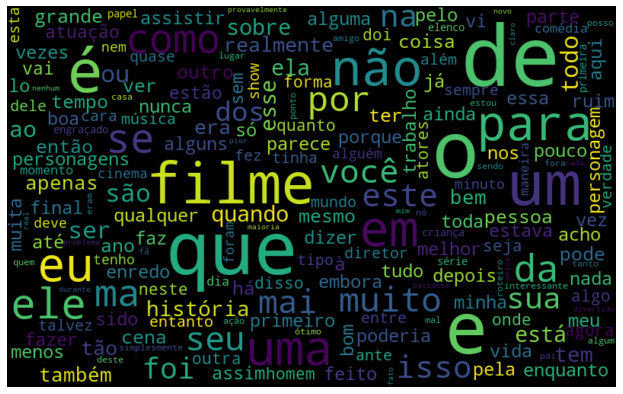

In [62]:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Wordcloud para comentários positivos

In [63]:
datapos = data[data['sentiment'] == 1]
wordcloudpos = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in datapos.text_pt]))

(-0.5, 799.5, 499.5, -0.5)

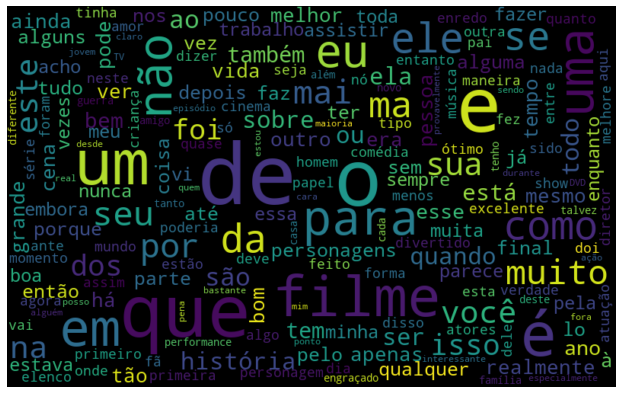

In [64]:
plt.figure(figsize=(12,7))
plt.imshow(wordcloudpos, interpolation='bilinear')
plt.axis("off")

Wordcloud para comentários negativos

In [65]:
dataneg = data[data['sentiment'] == 0]
wordcloudneg = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in dataneg.text_pt]))

(-0.5, 799.5, 499.5, -0.5)

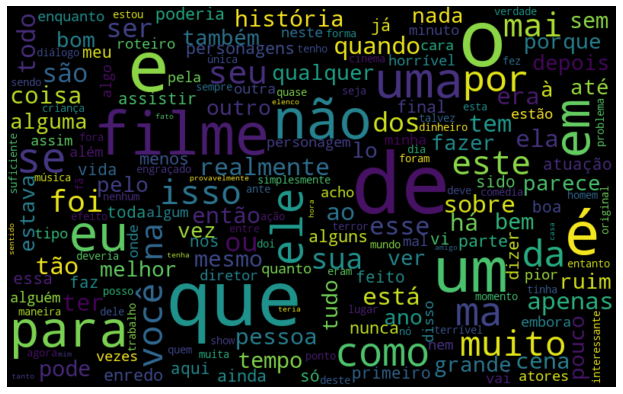

In [66]:
plt.figure(figsize=(12,7))
plt.imshow(wordcloudneg, interpolation='bilinear')
plt.axis("off")

Utilizando o NLTK

In [ ]:
import nltk
nltk.download('all')

In [70]:
from nltk import tokenize
tokenizer  = tokenize.WhitespaceTokenizer()
tokenized = tokenizer.tokenize(' '.join([text for text in data.text_pt]))

Utilizando os tokens para gerar um dicionário de frequências

In [71]:
freqdist = nltk.FreqDist(tokenized)

In [72]:
freqdist

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [83]:
df = pd.DataFrame({'word': list(freqdist.keys()), 'frequency': list(freqdist.values())})

In [84]:
df

,word,frequency
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [93]:
df20largest = df.nlargest(20, columns = 'frequency')

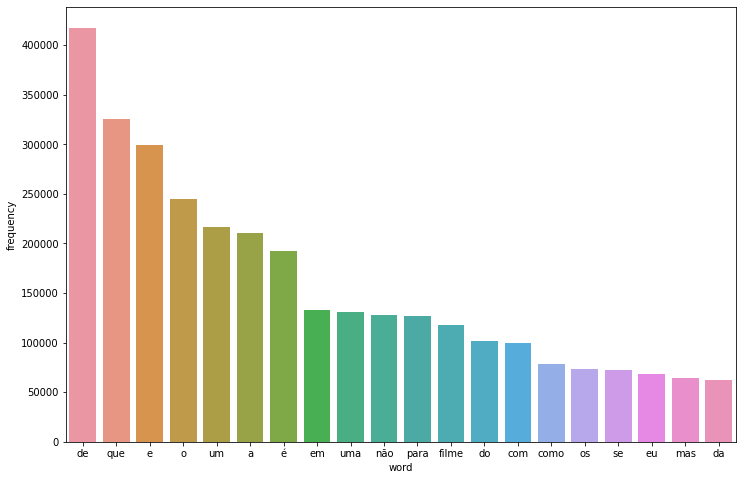

In [96]:
plt.figure(figsize=(12,8))
sns.barplot(x = df20largest.word, y = df20largest.frequency)

Removendo as Stop Words

In [97]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [98]:
data['text_pt'] = data['text_pt'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

Plotando as 20 palavras mais frequentes após a remoção das stopwords

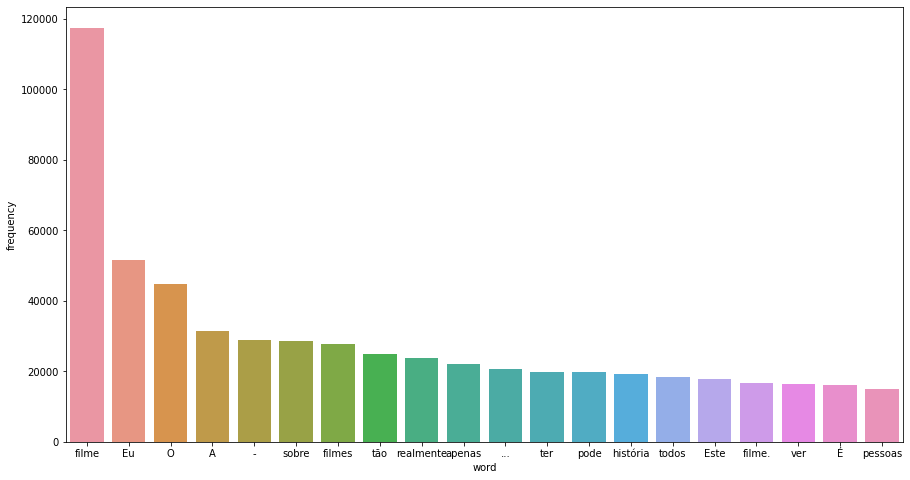

In [100]:
tokenized = tokenizer.tokenize(' '.join([text for text in data.text_pt]))
freqdist = nltk.FreqDist(tokenized)
df = pd.DataFrame({'word': list(freqdist.keys()), 'frequency': list(freqdist.values())})
df20largest = df.nlargest(20, columns = 'frequency')
plt.figure(figsize=(15,8))
sns.barplot(x = df20largest.word, y = df20largest.frequency)

(-0.5, 799.5, 499.5, -0.5)

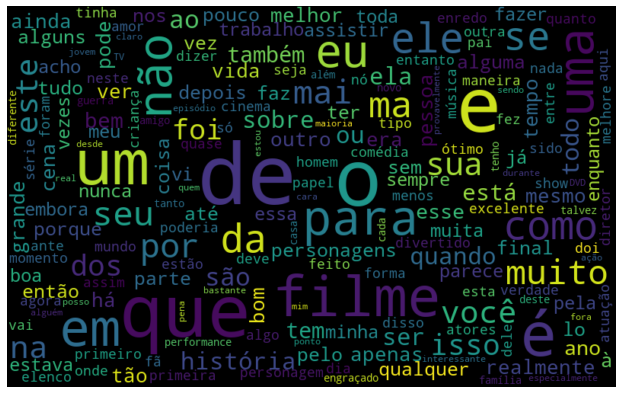

In [101]:
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in data.text_pt]))
plt.figure(figsize=(12,7))
plt.imshow(wordcloudpos, interpolation='bilinear')
plt.axis("off")

Testando o modelo sem as stopwords

In [102]:
bow = cv.fit_transform(data['text_pt'])
bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=cv.get_feature_names_out())
x_train, x_test, y_train, y_test = train_test_split(bow, data.sentiment, random_state = 42)
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8824100283057016